### Programming and critical analysis

Consider the following three regressors applied on `kin8nm.arff` data:
- linear regression with Ridge regularization term of 0.1
- two MLPs – MLP1 and MLP2 – each with two hidden layers of size 10, hyperbolic tangent
function as the activation function of all nodes, a maximum of 500 iterations, and a fixed
seed (`random_state=0`). MLP1 should be parameterized with early stopping while MLP2
should not consider early stopping. Remaining parameters (e.g., loss function, batch size,
regularization term, solver) should be set as default.

Using a 70-30 training-test split with a fixed seed (`random_state=0`):
- Compute the MAE of the three regressors: linear regression, MLP1 and MLP2.
- Plot the residues (in absolute value) using two visualizations: boxplots and histograms.
Hint: consider using boxplot and hist functions from matplotlib.pyplot to this end.
- How many iterations were required for MLP1 and MLP2 to converge? 

Linear Regression (Ridge regularization)
MAE: 0.162830
No. of iterations: None


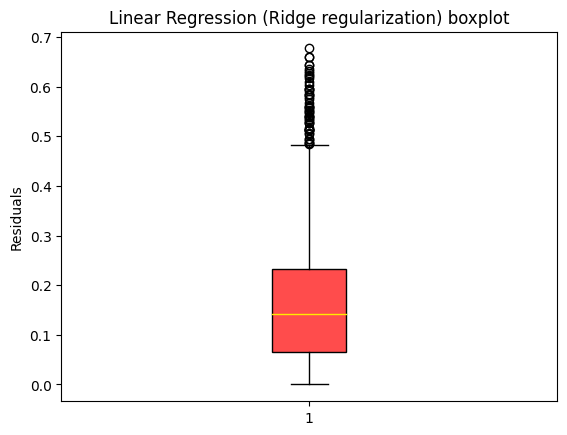

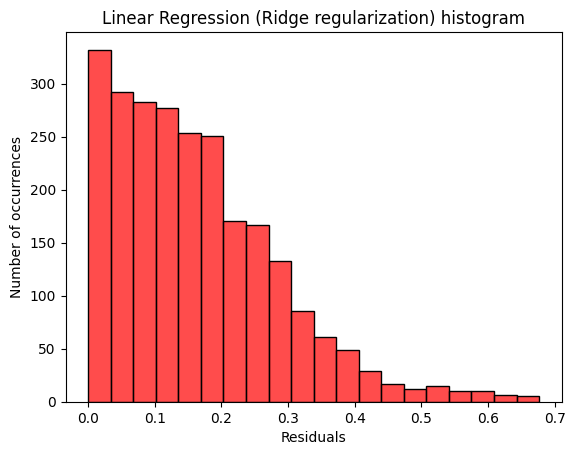

MLP Regressor (early stopping)
MAE: 0.068041
No. of iterations: 452


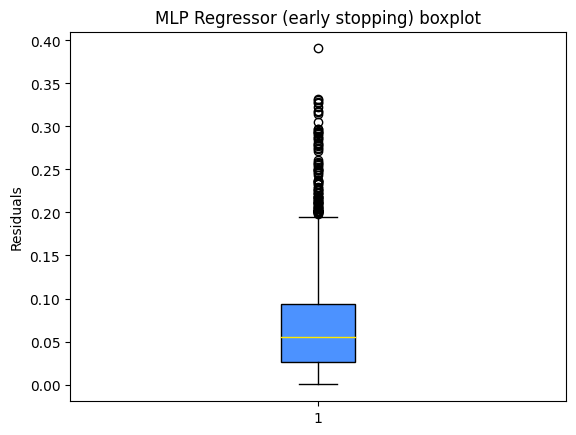

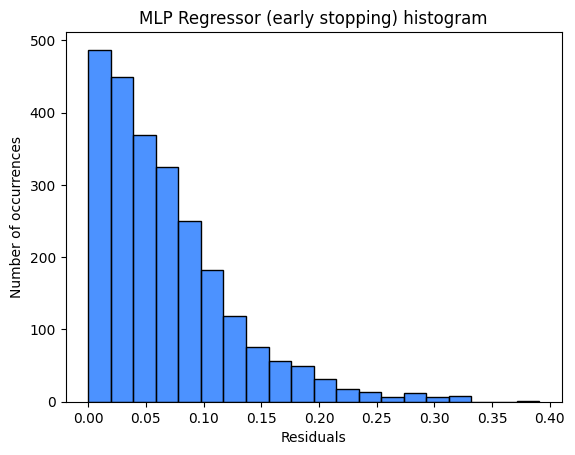

MLP Regressor (no early stopping)
MAE: 0.097807
No. of iterations: 77


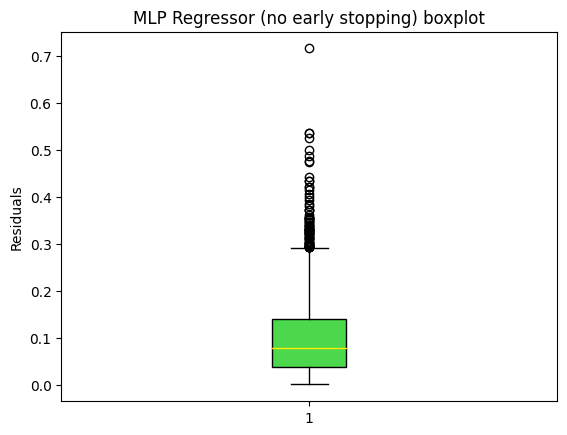

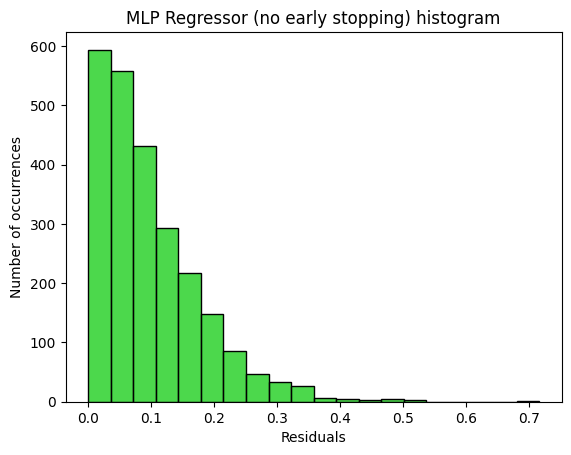

In [3]:
import pandas as pd
from scipy.io.arff import loadarff
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot

# Read the ARFF file and separate input from output data
data = loadarff('kin8nm.arff')
df = pd.DataFrame(data[0])
X = df.drop('y', axis=1)
y = df['y']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.30, random_state=0)

# Create the regressors
lin_reg_ridge = Ridge(alpha=0.1)
mlp_reg_1 = MLPRegressor(hidden_layer_sizes=(10, 10), activation='tanh', max_iter=500, random_state=0, early_stopping=True)
mlp_reg_2 = MLPRegressor(hidden_layer_sizes=(10, 10), activation='tanh', max_iter=500, random_state=0, early_stopping=False)

# Set lists to store values for the loop
regressor = [lin_reg_ridge, mlp_reg_1, mlp_reg_2]
caption = ['Linear Regression (Ridge regularization)', 'MLP Regressor (early stopping)', 'MLP Regressor (no early stopping)']
color = ['#ff0000b3', '#0064ffb3', '#00c800b3']
for i in range(0, 3):
    # Fit the regressor to the training data
    regressor[i].fit(X_train, y_train)
    # Predict the output according to the regressor
    y_pred = regressor[i].predict(X_test)
    # Compute the MAE of the regressors and see how many iterations were needed
    print(caption[i] + '\nMAE: {:.6f}'.format(mean_absolute_error(y_test, y_pred)))
    print('No. of iterations: ' + str(regressor[i].n_iter_))
    # Compute the residues
    residues = abs(y_test - y_pred)
    # Plot the residues using boxplots
    pyplot.boxplot(residues, patch_artist=True, boxprops=dict(facecolor=color[i]))['medians'][0].set_color('#ffea00')
    pyplot.title(caption[i] + ' boxplot')
    pyplot.ylabel('Residuals')
    pyplot.show()
    # Plot the residues using histograms
    pyplot.hist(residues, bins=20, facecolor=color[i], edgecolor='black')
    pyplot.title(caption[i] + ' histogram')
    pyplot.xlabel('Residuals')
    pyplot.ylabel('Number of occurrences')
    pyplot.show()